In [1]:
!pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install flair

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Import the necessary libraries/packages
# Data processing
import pandas as pd
import numpy as np

# Import TextBlob
from textblob import TextBlob

# Import VADER sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Import flair pre-trained sentiment model
from flair.models import TextClassifier
classifier = TextClassifier.load('en-sentiment')

# Import flair Sentence to process input text
from flair.data import Sentence

# Import accuracy_score to check performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

C:\ProgramData\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
C:\ProgramData\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [4]:
!pip install -U textblob

Defaulting to user installation because normal site-packages is not writeable


In [5]:
# Read in data
amz_review = pd.read_csv('datasets/yelp_labelled.txt', sep='\t', names=['review', 'label'])

# Take a look at the data
amz_review.head()

,review,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
# Get the dataset information
amz_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
# Check the label distribution
amz_review['label'].value_counts()

label
1    500
0    500
Name: count, dtype: int64

In [8]:
!python -m textblob.download_corpora
# to executes the TextBlob module's script to download necessary data,
# including datasets and corpora used for tasks like part-of-speech tagging, noun phrase extraction, and sentiment analysis.

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\ludovic.souquet\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ludovic.souquet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ludovic.souquet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ludovic.souquet\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\ludovic.souquet\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\ludovic.souquet\AppData\Roaming\nltk_data..

In [9]:
from textblob.sentiments import NaiveBayesAnalyzer

# Example text
text = "I love this product, it's absolutely wonderful!"

# Using Pattern Analyzer
blob_pattern = TextBlob(text)
print("Pattern Analyzer Sentiment:")
print("Polarity:", blob_pattern.sentiment.polarity)
print("Subjectivity:", blob_pattern.sentiment.subjectivity)

# Using Naive Bayes Analyzer
blob_naivebayes = TextBlob(text, analyzer=NaiveBayesAnalyzer())
print("\nNaive Bayes Analyzer Sentiment:")
print("Classification:", blob_naivebayes.sentiment.classification)
print("Positive Probability:", blob_naivebayes.sentiment.p_pos)
print("Negative Probability:", blob_naivebayes.sentiment.p_neg)

Pattern Analyzer Sentiment:
Polarity: 0.75
Subjectivity: 0.8

Naive Bayes Analyzer Sentiment:
Classification: pos
Positive Probability: 0.6560203571571461
Negative Probability: 0.34397964284285404


In [10]:
# List of words to check
words = ["happy", "sad", "neutral", "exciting", "frustrating","crazy","yummy", ":D", "}:("]

# Checking the sentiment of each word
for word in words:
    blob = TextBlob(word)
    print(f"Word: {word}, Sentiment: {blob.sentiment}")

Word: happy, Sentiment: Sentiment(polarity=0.8, subjectivity=1.0)
Word: sad, Sentiment: Sentiment(polarity=-0.5, subjectivity=1.0)
Word: neutral, Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
Word: exciting, Sentiment: Sentiment(polarity=0.3, subjectivity=0.8)
Word: frustrating, Sentiment: Sentiment(polarity=-0.4, subjectivity=0.9)
Word: crazy, Sentiment: Sentiment(polarity=-0.6, subjectivity=0.9)
Word: yummy, Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
Word: :D, Sentiment: Sentiment(polarity=1.0, subjectivity=1.0)
Word: }:(, Sentiment: Sentiment(polarity=-0.75, subjectivity=1.0)


In [11]:
# Example text
text = 'it\'s so sad.'

# TextBlob sentiment
textBlob_sentiment = TextBlob(text).sentiment
textBlob_sentiment

Sentiment(polarity=-0.5, subjectivity=1.0)

In [12]:
# Example text
text = 'It is a very interesting movie.'

# TextBlob sentiment
textBlob_sentiment = TextBlob(text).sentiment
textBlob_sentiment

Sentiment(polarity=0.65, subjectivity=0.65)

In [13]:
# Extract sentiment score
textBlob_sentiment.polarity

0.65

In [14]:
text2 = "This movie is sad."

# TextBlob sentiment
textBlob_sentiment2 = TextBlob(text2).sentiment
textBlob_sentiment2

Sentiment(polarity=-0.5, subjectivity=1.0)

In [15]:
textBlob_sentiment2.polarity

-0.5

In [16]:
# TextBlob sentiment using Naive Bayes Analyzer
blob_naivebayes = TextBlob(text2, analyzer=NaiveBayesAnalyzer())
print("Classification:", blob_naivebayes.sentiment.classification)
print("Positive Probability:", blob_naivebayes.sentiment.p_pos)
print("Negative Probability:", blob_naivebayes.sentiment.p_neg)

Classification: neg
Positive Probability: 0.4512680959058136
Negative Probability: 0.5487319040941867


In [17]:
text3 = "i love cooking."

# TextBlob sentiment
textBlob_sentiment3 = TextBlob(text3).sentiment
textBlob_sentiment3

Sentiment(polarity=0.5, subjectivity=0.6)

In [18]:
# Extract sentiment score
textBlob_sentiment2.polarity

-0.5

In [19]:
# TextBlob sentiment using Naive Bayes Analyzer
blob_naivebayes = TextBlob(text3, analyzer=NaiveBayesAnalyzer())
print("Classification:", blob_naivebayes.sentiment.classification)
print("Positive Probability:", blob_naivebayes.sentiment.p_pos)
print("Negative Probability:", blob_naivebayes.sentiment.p_neg)

Classification: pos
Positive Probability: 0.5129615458197816
Negative Probability: 0.4870384541802183


In [20]:
# Take a peek on VADER's lexicon
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Import the SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Accessing the lexicon (a dictionary of words and their sentiment scores)
vader_lexicon = sid.lexicon

# Displaying a portion of the lexicon
for word in list(vader_lexicon.keys())[-30:]:  # Display last 30 words for brevity
    print(f"{word}: {vader_lexicon[word]}")

wrong: -2.1
wronged: -1.9
yay: 2.4
yeah: 1.2
yearning: 0.5
yeees: 1.7
yep: 1.2
yes: 1.7
youthful: 1.3
yucky: -1.8
yummy: 2.4
zealot: -1.9
zealots: -0.8
zealous: 0.5
{:: 1.8
|-0: -1.2
|-:: -0.8
|-:>: -1.6
|-o: -1.2
|:: -0.5
|;-): 2.2
|=: -0.4
|^:: -1.1
|o:: -0.9
||-:: -2.3
}:: -2.1
}:(: -2.0
}:): 0.4
}:-(: -2.1
}:-): 0.3


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ludovic.souquet\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
# Example text
text = 'this dog is very funny.'

# VADER Sentiment
vader = SentimentIntensityAnalyzer()
vader_sentiment = vader.polarity_scores(text)
vader_sentiment

{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4927}

In [22]:
# Extract sentiment score
vader_sentiment['compound']

0.4927

In [23]:
text2 = "this dog is not funny."
vader_sentiment2 = vader.polarity_scores(text2)
vader_sentiment2

{'neg': 0.376, 'neu': 0.624, 'pos': 0.0, 'compound': -0.3412}

In [24]:
# Extract sentiment score
vader_sentiment2['compound']

-0.3412

In [25]:
text3 = "I cannot say that this dog is funny."
vader_sentiment3 = vader.polarity_scores(text3)
vader_sentiment3

{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}

In [26]:
# Example text
text = 'It is an interesting dog.'

# Flair tokenization
sentence = Sentence(text)
sentence

Sentence[6]: "It is an interesting dog."

In [27]:
# Flair sentiment prediction
classifier.predict(sentence)
sentence

Sentence[6]: "It is an interesting dog." → POSITIVE (0.9831)

In [28]:
# Example text
text = 'It is a very funny dog.'

# Flair tokenization
sentence = Sentence(text)
sentence

Sentence[7]: "It is a very funny dog."

In [29]:
# Flair sentiment prediction
classifier.predict(sentence)
sentence

Sentence[7]: "It is a very funny dog." → POSITIVE (0.9996)

In [30]:
# Extract sentiment prediction score
print(f'Flair classified the review as {sentence.labels[0].value} with the score of {sentence.labels[0].score:.2f}')

Flair classified the review as POSITIVE with the score of 1.00


In [31]:
# Example text
text2 = 'This movie dot is not funny.'

# Flair tokenization
sentence2 = Sentence(text2)
sentence2

Sentence[7]: "This movie dot is not funny."

In [32]:
# Flair sentiment prediction
classifier.predict(sentence2)
sentence2

Sentence[7]: "This movie dot is not funny." → NEGATIVE (0.9999)

In [33]:
# Extract sentiment prediction score
print(f'Flair classified the review as {sentence2.labels[0].value} with the score of {sentence2.labels[0].score:.2f}')

Flair classified the review as NEGATIVE with the score of 1.00


In [34]:
# Example text
text3 = 'I cannot say that this dog is funny.'

# Flair tokenization
sentence3 = Sentence(text3)
sentence3

Sentence[9]: "I cannot say that this dog is funny."

In [35]:
# Flair sentiment prediction
classifier.predict(sentence3)
sentence3

Sentence[9]: "I cannot say that this dog is funny." → NEGATIVE (0.5917)

In [36]:
# Extract sentiment prediction score
print(f'Flair classified the review as {sentence3.labels[0].value} with the score of {sentence3.labels[0].score:.2f}')

Flair classified the review as NEGATIVE with the score of 0.59


In [37]:
# Get sentiment score for each review
amz_review['scores_TextBlob'] = amz_review['review'].apply(lambda s: TextBlob(s).sentiment.polarity)

# Predict sentiment label for each review
amz_review['pred_TextBlob'] = amz_review['scores_TextBlob'].apply(lambda x: 1 if x >=0 else 0)
amz_review.head()

,review,label,scores_TextBlob,pred_TextBlob
0,Wow... Loved this place.,1,0.40,1
1,Crust is not good.,0,-0.35,0
2,Not tasty and the texture was just nasty.,0,-1.00,0
3,Stopped by during the late May bank holiday of...,1,0.20,1
4,The selection on the menu was great and so wer...,1,0.80,1


In [57]:
# Compare Actual and Predicted and get the Accuracy, Precision, Recall, and F1 score
actual_labels = amz_review['label']
predicted_labels = amz_review['pred_VADER']

accuracy_VADER = accuracy_score(actual_labels,predicted_labels)
precision_VADER = precision_score(actual_labels, predicted_labels, average='macro')  # Use 'micro' or 'weighted' if more appropriate
recall_VADER = recall_score(actual_labels, predicted_labels, average='macro')
f1_VADER = f1_score(actual_labels, predicted_labels, average='macro')

print(f'Accuracy:', accuracy_VADER)
print(f'Precision:', precision_VADER)
print(f'Recall:', recall_VADER)
print(f'F1:', f1_VADER)

Accuracy: 0.723
Precision: 0.7919597174144153
Recall: 0.723
F1: 0.7056169768670207


In [38]:
# Compare Actual and Predicted and get the Accuracy, Precision, Recall, and F1 score
actual_labels = amz_review['label']
predicted_labels = amz_review['pred_TextBlob']

accuracy_TextBlob = accuracy_score(actual_labels,predicted_labels)
precision_TextBlob = precision_score(actual_labels, predicted_labels, average='macro')  # Use 'micro' or 'weighted' if more appropriate
recall_TextBlob = recall_score(actual_labels, predicted_labels, average='macro')
f1_TextBlob = f1_score(actual_labels, predicted_labels, average='macro')

print(f'Accuracy:', accuracy_TextBlob)
print(f'Precision:', precision_TextBlob)
print(f'Recall:', recall_TextBlob)
print(f'F1:', f1_TextBlob)

Accuracy: 0.695
Precision: 0.7606965812651405
Recall: 0.695
F1: 0.6744927155738694


In [53]:
# Function to apply Naive Bayes Sentiment Analysis
def naive_bayes_sentiment(text):
    blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
    return blob.sentiment.classification

# Applying the Naive Bayes classifier to get sentiment
amz_review['naive_bayes_analysis'] = amz_review['review'].apply(naive_bayes_sentiment)

# Predict sentiment label (1 for positive, 0 for negative)
amz_review['pred_TextBlob_NaiveBayes'] = amz_review['naive_bayes_analysis'].apply(lambda x: 1 if x.classification == 'pos' else 0)
amz_review.head()

KeyboardInterrupt: 

In [56]:
# Compare Actual and Predicted and get the Accuracy, Precision, Recall, and F1 score
actual_labels = amz_review['label']
predicted_labels = amz_review['pred_TextBlob_NaiveBayes']

accuracy_TextBlob_NB = accuracy_score(actual_labels,predicted_labels)
precision_TextBlob_NB = precision_score(actual_labels, predicted_labels, average='macro')  # Use 'micro' or 'weighted' if more appropriate
recall_TextBlob_NB = recall_score(actual_labels, predicted_labels, average='macro')
f1_TextBlob_NB = f1_score(actual_labels, predicted_labels, average='macro')

print(f'Accuracy:', accuracy_TextBlob_NB)
print(f'Precision:', precision_TextBlob_NB)
print(f'Recall:', recall_TextBlob_NB)
print(f'F1:', f1_TextBlob_NB)

KeyError: 'pred_TextBlob_NaiveBayes'

In [41]:
# Get sentiment score for each review
vader_sentiment = SentimentIntensityAnalyzer()
amz_review['scores_VADER'] = amz_review['review'].apply(lambda s: vader_sentiment.polarity_scores(s)['compound'])

# Predict sentiment label for each review
amz_review['pred_VADER'] = amz_review['scores_VADER'].apply(lambda x: 1 if x >=0 else 0)
amz_review.head()

,review,label,scores_TextBlob,pred_TextBlob,scores_VADER,pred_VADER
0,Wow... Loved this place.,1,0.40,1,0.5994,1
1,Crust is not good.,0,-0.35,0,-0.3412,0
2,Not tasty and the texture was just nasty.,0,-1.00,0,-0.5574,0
3,Stopped by during the late May bank holiday of...,1,0.20,1,0.6908,1
4,The selection on the menu was great and so wer...,1,0.80,1,0.6249,1


In [42]:
# Define a function to get Flair sentiment prediction score
def score_flair(text):
    sentence = Sentence(text)
    classifier.predict(sentence)
    score = sentence.labels[0].score
    value = sentence.labels[0].value
    return score, value

In [43]:
# Get sentiment score for each review
amz_review['scores_flair'] = amz_review['review'].apply(lambda s: score_flair(s)[0])

# Predict sentiment label for each review
amz_review['pred_flair'] = amz_review['review'].apply(lambda s: score_flair(s)[1])

In [44]:
amz_review.head()

,review,label,scores_TextBlob,pred_TextBlob,scores_VADER,pred_VADER,scores_flair,pred_flair
0,Wow... Loved this place.,1,0.40,1,0.5994,1,0.992839,POSITIVE
1,Crust is not good.,0,-0.35,0,-0.3412,0,0.999943,NEGATIVE
2,Not tasty and the texture was just nasty.,0,-1.00,0,-0.5574,0,0.999888,NEGATIVE
3,Stopped by during the late May bank holiday of...,1,0.20,1,0.6908,1,0.993655,POSITIVE
4,The selection on the menu was great and so wer...,1,0.80,1,0.6249,1,0.988007,POSITIVE


In [45]:
# Check the distribution of the score
amz_review['scores_flair'].describe()

count    1000.000000
mean        0.971674
std         0.083650
min         0.502009
25%         0.991594
50%         0.998672
75%         0.999800
max         0.999998
Name: scores_flair, dtype: float64

In [46]:
# Check the counts of labels
amz_review['pred_flair'].value_counts()

pred_flair
POSITIVE    510
NEGATIVE    490
Name: count, dtype: int64

In [47]:
# Change the label of flair prediction to 0 if negative and 1 if positive
mapping = {'NEGATIVE': 0, 'POSITIVE': 1}
amz_review['pred_flair'] = amz_review['pred_flair'].map(mapping)

In [48]:
# Check counts
amz_review['pred_flair'].value_counts()

pred_flair
1    510
0    490
Name: count, dtype: int64

In [49]:
# Compare Actual and Predicted and get the Accuracy, Precision, Recall, and F1 score
actual_labels = amz_review['label']
predicted_labels = amz_review['pred_flair']

accuracy_flair = accuracy_score(actual_labels,predicted_labels)
precision_flair = precision_score(actual_labels, predicted_labels, average='macro')  # Use 'micro' or 'weighted' if more appropriate
recall_flair = recall_score(actual_labels, predicted_labels, average='macro')
f1_flair = f1_score(actual_labels, predicted_labels, average='macro')

print(f'Accuracy:', accuracy_flair)
print(f'Precision:', precision_flair)
print(f'Recall:', recall_flair)
print(f'F1:', f1_flair)

Accuracy: 0.93
Precision: 0.930172068827531
Recall: 0.9299999999999999
F1: 0.9299929992999301


In [50]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


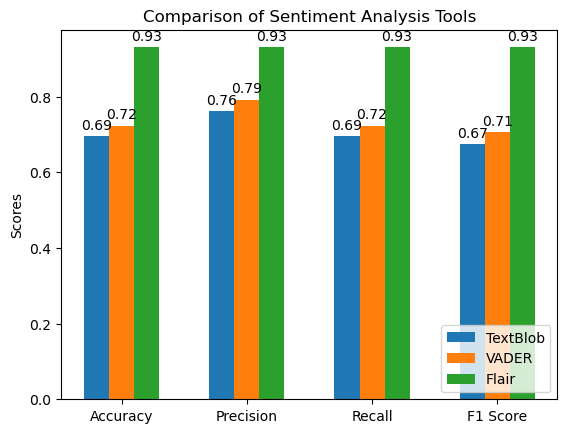

In [58]:
import matplotlib.pyplot as plt

# Conver the results in lists
textblob_values = [accuracy_TextBlob, precision_TextBlob, recall_TextBlob, f1_TextBlob]
# textblobNB_values = [accuracy_TextBlob_NB, precision_TextBlob_NB, recall_TextBlob_NB, f1_TextBlob_NB]
vader_values = [accuracy_VADER, precision_VADER, recall_VADER, f1_VADER]
flair_values = [accuracy_flair, precision_flair, recall_flair, f1_flair]

labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Setting the positions and width for the bars
x = range(len(labels))  # the label locations
width = 0.2  # the width of the bars

# Plotting
fig, ax = plt.subplots()
rects1 = ax.bar(x, textblob_values, width, label='TextBlob')
rects2 = ax.bar([p + width for p in x], vader_values, width, label='VADER')
rects3 = ax.bar([p + width * 2 for p in x], flair_values, width, label='Flair')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Comparison of Sentiment Analysis Tools')
ax.set_xticks([p + width for p in x])
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

# Function to add labels on the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Attach labels
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Show the plot
plt.show()